In [221]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

width = 500
height = 500
image = Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

#seed = 12345

# set numpy random seed
#np.random.seed(seed)

FFFFFFFF-[[FFFF-[[FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFF[+FFFFFF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]-FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFF-[[FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFF[+FFFFFF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]-FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFFFFFF[+FFFFFFFFFFFF-[[FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFF[+FFFFFF-[[F-[[X

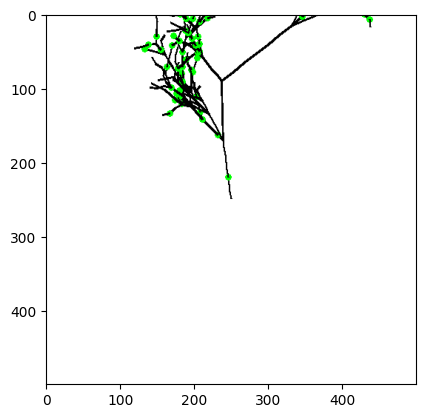

In [222]:
rule_book = [
    {
        "axiom": "F",
        "rules": [
            ("F", "F[+F]F[-F][F]", 0.33),
            ("F", "F[+F][F]", 0.34),
            ("F", "F[-F][F]", 0.34),
        ]
    },
    {
        "axiom": "X",
        "rules": [
            ("F", "FF", 1.0),
            ("X", "F+[-F-XF-X][+FF][--XF[+X]][++F-X]", 1.0),
        ]
    },
    {
        "axiom": "F",
        "rules": [
            ("F", "FF+[+F-F-F]-[-F+F+F]", 1.0),
        ]
    },
    {
        "axiom": "X",
        "rules": [
            ("F", "FX[FX[+XF]]", 1.0),
            ("X", "FF[+XZ++X-F[+ZX]][-X++F-X]", 1.0),
            ("Z", "[+F-X-F][++ZX]", 1.0),
        ]
    },
    {
        "axiom": "F",
        "rules": [
            ("F", "F[+F]F[-F][F]", 1.0),
        ]
    },
    {
        "axiom": "X",
        "rules": [
            ("X", "F[+X]F[-X]+X", 0.33),
            ("X", "F[-X]F[-X]+X", 0.33),
            ("X", "F[-X]F+X", 0.34),
            ("F", "FF", 1.0),
        ]
    },
    {
        "axiom": "X",
        "rules": [
            ("X", "F[-[[X]+X]]+F[+FX]-X", 1.0),
            ("F", "FF", 1.0),
        ]
    },
    # seaweed 08 preset
    {
        "axiom": "X",
        "rules": [
            ("X", "F-[[X]+X]+F[+FX]-X", 1.0),
            ("F", "FF", 1.0),
        ]
    },
    # hexagonal gosper preset
    {
        "axiom": "A",
        "rules": [
            ("A", "A-B--B+A++AA+B-", 1.0),
            ("B", "+A-BB--B-A++A+B", 1.0),
        ]
    },
]

def to_rads(angle):
    return angle * np.pi / 180

def select_rule(rules):
    r = np.random.uniform(0, 1)
    for rule in rules:
        if r < rule[2]:
            return rule
    return rules[-1]

def l_system(preset, iterations):
    system = preset["axiom"]
    for i in range(iterations):
        new_system = ""
        for letter in system:
            matching_rules = []
            for rule in preset["rules"]:
                if letter == rule[0]:
                    matching_rules.append(rule)
    
            if len(matching_rules) > 0:
                new_system += select_rule(matching_rules)[1]
            else:
                new_system += letter

        system = new_system
    return system

def draw_l_system(system, angle, length):
    stack = []
    x = width / 2
    y = height / 2
    a = to_rads(90)
    for letter in system:
        if letter == "F":
            x1 = x + length * np.cos(angle)
            y1 = y + length * np.sin(angle)
            draw.line((x, y, x1, y1), fill=(0, 0, 0), width=3)

            # draw leaves
            if np.random.uniform(0, 1) < 0.2:
                draw.ellipse((x1 - 4, y1 - 4, x1 + 4, y1 + 4), fill=(0, 255, 0))

            x = x1
            y = y1
        elif letter == "+":
            angle += to_rads(angle) + np.random.uniform(-0.5, 0.5)
        elif letter == "-":
            angle -= to_rads(angle) + np.random.uniform(-0.5, 0.5)
        elif letter == "[":
            stack.append((x, y, angle))
        elif letter == "]":
            x, y, angle = stack.pop()

preset = rule_book[-1]
system = l_system(preset, 4)

print(system)

draw_l_system(system, 25, 10)

# rotate image
image = image.rotate(90, expand=True)

plt.imshow(image)